# Python setup for Elmer

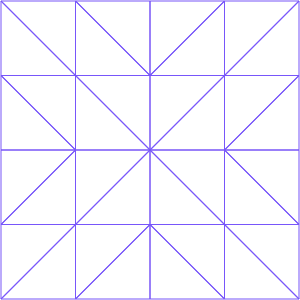

In [1]:
import skfem as fem

m = fem.MeshTri.init_sqsymmetric().refined(1).with_boundaries({
    'left': lambda x: x[0] == 0,
    'right': lambda x: x[0] == 1,
})
m  # use this in Elmer?

In [2]:
sif = """
Check Keywords "Warn"

Header
  Mesh DB "." "."
End

Simulation
  Max Output Level = 5
  Coordinate System = Cartesian
  Simulation Type = Steady
  Output Intervals(1) = 1
  Steady State Max Iterations = 1
  Post File = "results.vtu"
End
"""

In [3]:
sif += """
Body 1
  Equation = 1
  Body Force = 1
End

Body Force 1 :: Source = Real 1.0
Equation 1 :: Active Solvers(1) = 1

Solver 1
  Equation = "Poisson"
  Variable = "Potential"
  Variable DOFs = 1
  Procedure = "Poisson" "PoissonSolver"
  Linear System Solver = "Direct"
  Linear System Direct Method = UMFPack
  Steady State Convergence Tolerance = 1e-09
End

Boundary Condition 1
  Target Boundaries(1) = {left}  ! named boundary
  Potential = Real 0
End

Boundary Condition 2
  Target Boundaries(1) = {right} ! named boundary
  Potential = Real 0.1
End

"""

In [4]:
import elmer

case = elmer.Case(m, sif)
results = case.run(
    fetch='results_t0001.vtu',
    verbose=True,
)

Pulling from kinnala/elmer
Digest: sha256:2a19d445a8fa0d455ce2aa99355661fb7f80df497f82e0a161580efdfbafc7ff
Status: Image is up to date for ghcr.io/kinnala/elmer:devel-ba15974
ELMER SOLVER (v 9.0) STARTED AT: 2021/06/30 15:12:16
ParCommInit:  Initialize #PEs:            1
MAIN: 
MAIN: =============================================================
MAIN: ElmerSolver finite element software, Welcome!
MAIN: This program is free software licensed under (L)GPL
MAIN: Copyright 1st April 1995 - , CSC - IT Center for Science Ltd.
MAIN: Webpage http://www.csc.fi/elmer, Email elmeradm@csc.fi
MAIN: Version: 9.0 (Rev: ba15974, Compiled: 2021-06-29)
MAIN:  Running one task without MPI parallelization.
MAIN:  Running with just one thread per task.
MAIN: =============================================================
LoadInputFile: Trying to read "Run Control" section only
MAIN: 
MAIN: 
MAIN: -------------------------------------
MAIN: Reading Model: /tmp89teo4y0.sif
LoadInputFile: Scanning input file: /t

In [5]:
results

<meshio mesh object>
  Number of points: 25
  Number of cells:
    triangle: 32
    line: 16
  Point data: potential
  Cell data: GeometryIds

In [6]:
results.point_data['potential']

array([[0.        ],
       [0.16904762],
       [0.1       ],
       [0.        ],
       [0.18095238],
       [0.1       ],
       [0.        ],
       [0.16904762],
       [0.1       ],
       [0.1172619 ],
       [0.        ],
       [0.11875   ],
       [0.1672619 ],
       [0.175     ],
       [0.16875   ],
       [0.1       ],
       [0.1202381 ],
       [0.        ],
       [0.1702381 ],
       [0.11875   ],
       [0.175     ],
       [0.16875   ],
       [0.1       ],
       [0.1172619 ],
       [0.1672619 ]])

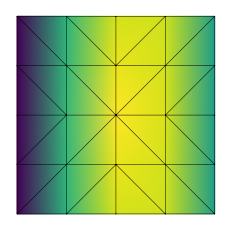

In [7]:
from skfem.visuals.matplotlib import plot, draw, show

ax = draw(m)
plot(m, results.point_data['potential'].flatten(), ax=ax, shading='gouraud')